In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude


In [2]:
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | celano
Processing Record 2 of Set 1 | santa maria jalapa del marques
City not found. Skipping...
Processing Record 3 of Set 1 | atwater
Processing Record 4 of Set 1 | camacupa
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | berezovyy
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | tazacorte
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | haciqabul
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | richards bay
Processing Record 2

In [4]:
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,celano,42.0855,13.5398,16.45,61,1,0.45,IT,1715496405
1,atwater,37.3477,-120.6091,22.86,63,0,1.54,US,1715496407
2,camacupa,-12.0167,17.4833,18.01,53,9,1.69,AO,1715496407
3,grytviken,-54.2811,-36.5092,1.38,89,97,3.66,GS,1715496408
4,berezovyy,51.6667,135.7000,4.12,86,100,3.25,RU,1715496409


In [12]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,celano,42.0855,13.5398,16.45,61,1,0.45,IT,1715496405
1,atwater,37.3477,-120.6091,22.86,63,0,1.54,US,1715496407
2,camacupa,-12.0167,17.4833,18.01,53,9,1.69,AO,1715496407
3,grytviken,-54.2811,-36.5092,1.38,89,97,3.66,GS,1715496408
4,berezovyy,51.6667,135.7000,4.12,86,100,3.25,RU,1715496409


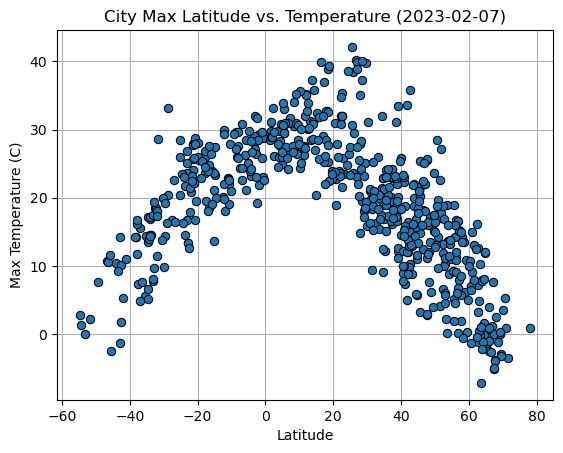

In [14]:
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

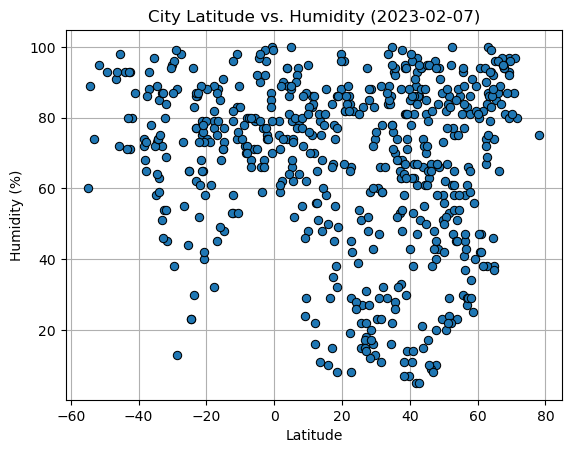

In [15]:
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

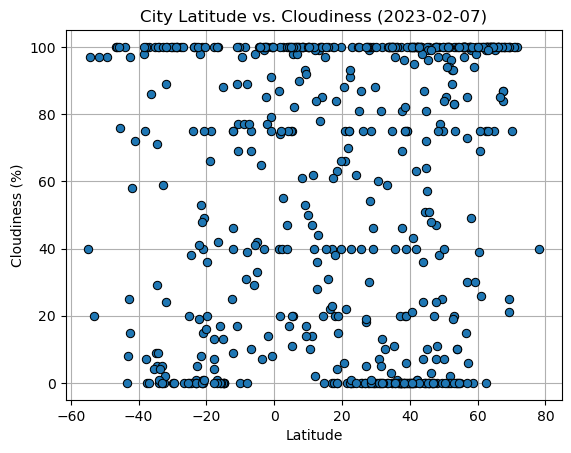

In [16]:
plt.plot(city_data_df["Lat"],
         city_data_df["Cloudiness"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


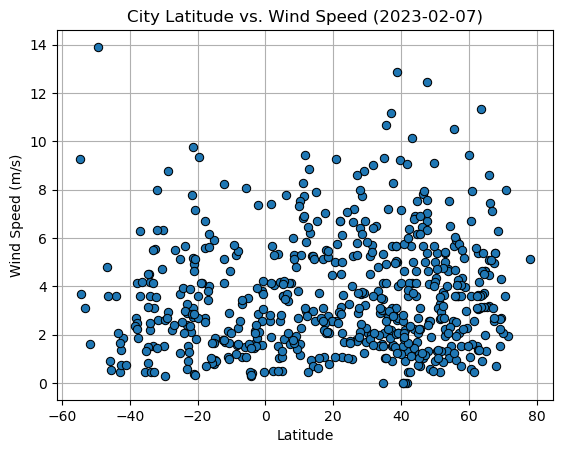

In [17]:
plt.plot(city_data_df["Lat"],
         city_data_df["Wind Speed"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [18]:
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [19]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,celano,42.0855,13.5398,16.45,61,1,0.45,IT,1715496405
1,atwater,37.3477,-120.6091,22.86,63,0,1.54,US,1715496407
4,berezovyy,51.6667,135.7000,4.12,86,100,3.25,RU,1715496409
5,dudinka,69.4058,86.1778,-2.96,97,100,2.68,RU,1715496409
6,badger,64.8000,-147.5333,11.95,38,75,4.63,US,1715496410


In [20]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,camacupa,-12.0167,17.4833,18.01,53,9,1.69,AO,1715496407
3,grytviken,-54.2811,-36.5092,1.38,89,97,3.66,GS,1715496408
7,port-aux-francais,-49.3500,70.2167,7.62,93,97,13.90,TF,1715496410
11,margaret river,-33.9500,115.0667,16.91,85,100,2.17,AU,1715496413
14,west island,-12.1568,96.8225,29.99,79,75,5.14,CC,1715496414


The r-value is: 0.6774197947469704


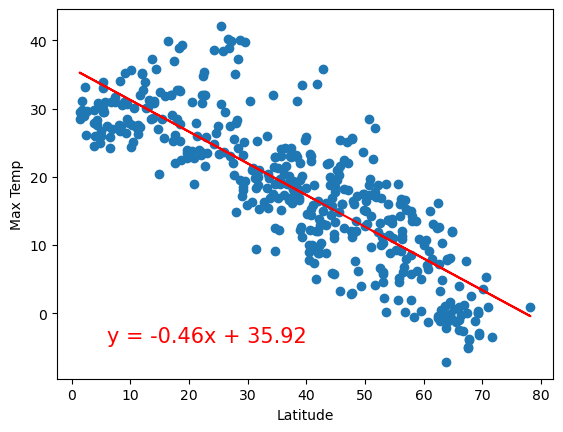

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6281564510164043


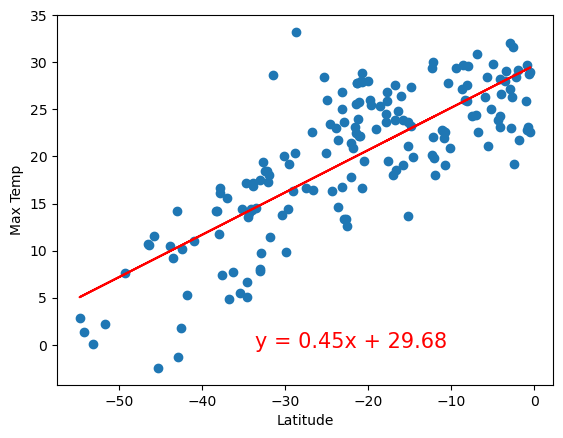

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

The r-value is: 0.005861304572509655


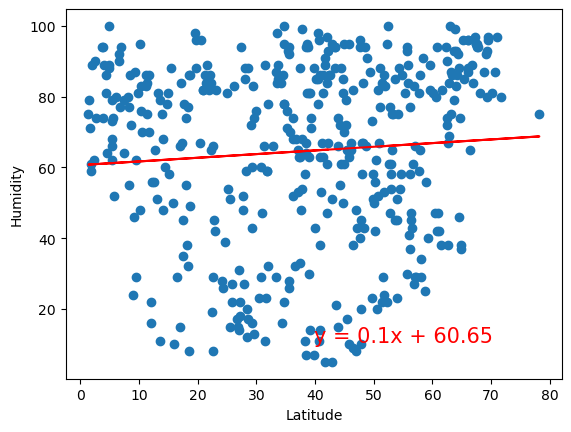

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 9.975931358541446e-05


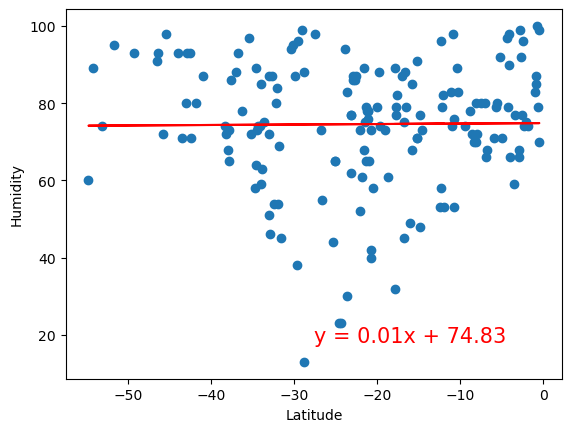

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.021141804839544958


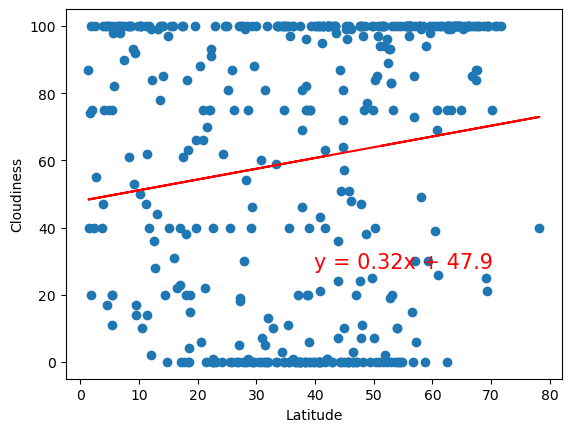

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.003799038011829991


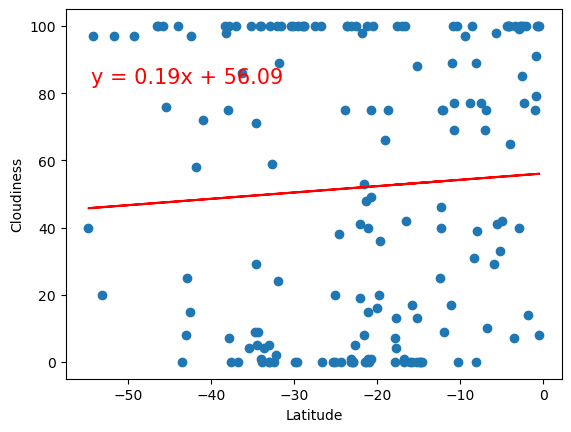

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

The r-value is: 1.0298025966586127e-08


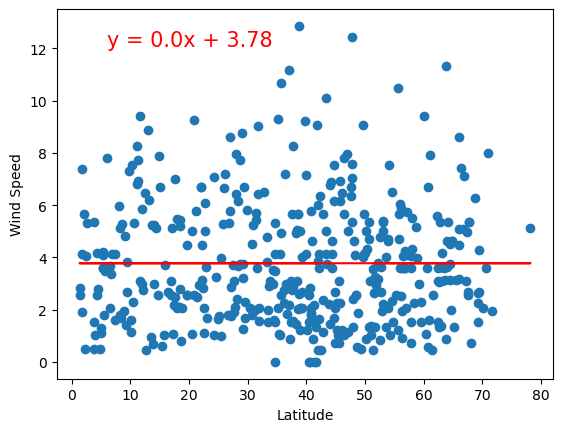

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.014217203972319218


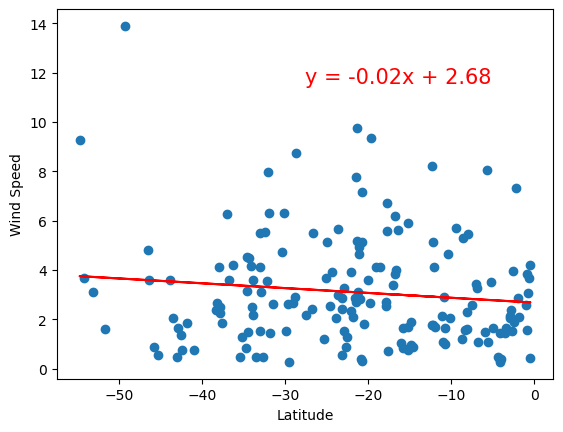

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)